In [2]:
# Social_network_Ads.csv

In [4]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
x = df.drop(['User ID', 'Purchased'], axis = 1)
y = df['Purchased']

In [10]:
# ohe
x = pd.get_dummies(x, columns=['Gender'], drop_first= True)

In [12]:
x

,Age,EstimatedSalary,Gender_Male
0,19.0,19000.0,True
1,35.0,20000.0,True
2,26.0,43000.0,False
3,27.0,57000.0,False
4,19.0,76000.0,True
...,...,...,...
395,46.0,41000.0,False
396,51.0,23000.0,True
397,50.0,20000.0,False
398,36.0,33000.0,True


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 42,
                                                   test_size= 0.20)

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()

In [38]:
model.add(Dense(10, activation= 'sigmoid', input_dim = 3))
model.add(Dense(1, activation= 'sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [44]:
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3952 - loss: 0.8053 - val_accuracy: 0.3281 - val_loss: 0.8713
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3878 - loss: 0.8024 - val_accuracy: 0.3594 - val_loss: 0.8505
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4236 - loss: 0.7974 - val_accuracy: 0.3438 - val_loss: 0.8304
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4342 - loss: 0.7823 - val_accuracy: 0.3750 - val_loss: 0.8113
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4587 - loss: 0.7599 - val_accuracy: 0.3750 - val_loss: 0.7935
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4732 - loss: 0.7683 - val_accuracy: 0.4375 - val_loss: 0.7764
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5657 - loss: 0.7288 - val_accuracy: 0.4844 - val_loss: 0.7607
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5885 - loss: 0.7236 - val_accuracy: 0.5156 - val_loss: 0.7460

In [46]:
model.layers[0].get_weights()

[array([[ 0.8307576 , -0.18881206,  0.67554134,  0.95416516,  0.7741931 ,
          1.0593712 ,  0.98122704, -0.22395407, -0.1215217 , -1.0017866 ],
        [ 0.85338926, -0.9053941 ,  0.06563197,  0.24699953,  0.28253722,
          0.78788334, -0.01314797, -1.0131403 , -1.0429136 ,  0.03134529],
        [ 0.27706382, -0.43666556, -0.10452715,  0.13286373, -0.31608108,
         -0.26406145, -0.02011194,  0.11540867,  0.23519684, -0.16535728]],
       dtype=float32),
 array([-0.25886086,  0.17304744, -0.23336755, -0.1953175 , -0.21715456,
        -0.24106236, -0.26520526,  0.39503005,  0.41510484,  0.3159487 ],
       dtype=float32)]

In [48]:
# predict on test

y_log = model.predict(x_test)  # will give probabilities

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [52]:
y_log;

In [54]:
# convert prob to 0 and 1
# if > 0.5, then 1, else 0
y_pred = np.where(y_log > 0.5, 1, 0)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.875

In [62]:
history.history; # key - value pairs

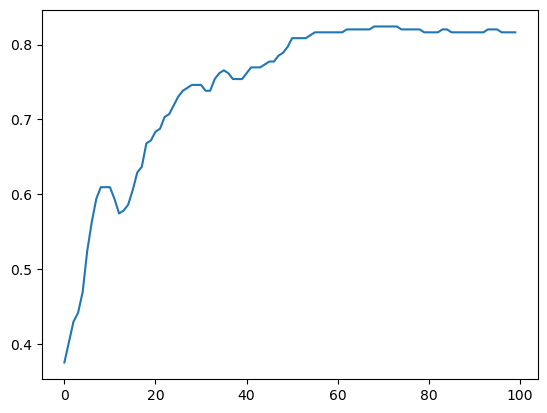

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']);

# public review

https://mitu.co.in/review

In [ ]:
https://mitu.co.in/feedback